<a href="https://colab.research.google.com/github/xhroch01/MPA-MLF/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Feedforward Neural Networks**

0. First import libraries

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
import tensorflow as tf
import matplotlib.pyplot as plt

**1. prepare data**
In this part, the task would be to prepade our dataset, basically it is the logic table for XOR function

In [9]:
import numpy as np

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# X = [[0, 0], [0, 1], [1, 0], [1, 1]]
# y = [0, 1, 1, 0]

**2. Creating the model**
To create a model of NN that is in the picture above, run the following cell

In [18]:
model = Sequential()
model.add(InputLayer(input_shape=(2,)))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

**3. Compile the model**
To compile yor model run:

In [11]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

**4. Model training**

In [12]:
history = model.fit(X, y, epochs=2000, batch_size=1, verbose=0)

**5. Model evaluation**

In [13]:
loss, accuracy = model.evaluate(X, y, verbose=0)
print('Accuracy: {:.2f}'.format(accuracy*100))

Accuracy: 100.00


**6. Model predictions**

In [19]:
for id_x, data_sample in enumerate(X):
    prediction = model.predict(np.expand_dims(data_sample, axis=0))
    print(f"Data sample is {data_sample}, prediction from model {prediction}, ground_truth {y[id_x]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Data sample is [0 0], prediction from model [[[0.5240673]
  [0.5240673]]], ground_truth 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Data sample is [0 1], prediction from model [[[0.5240673]
  [0.5318476]]], ground_truth 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Data sample is [1 0], prediction from model [[[0.5318476]
  [0.5240673]]], ground_truth 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Data sample is [1 1], prediction from model [[[0.5318476]
  [0.5318476]]], ground_truth 0


**7. Display loss function during the training process and acuracy**

Text(0, 0.5, 'loss')

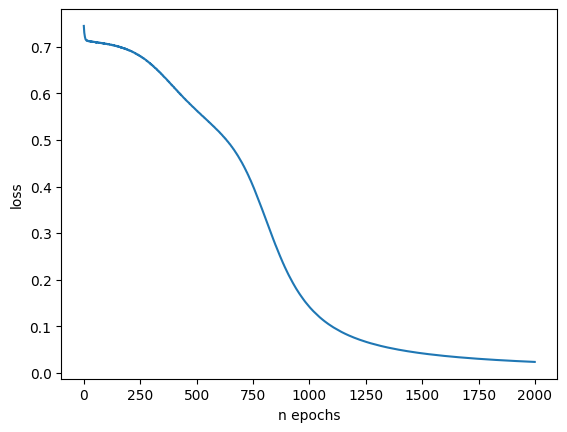

In [20]:
plt.figure()
plt.plot(history.history['loss'])
plt.xlabel('n epochs')
plt.ylabel('loss')

**Exercise 2 - Congressional Voting Data**

In [21]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import matplotlib.pyplot as plt

**1. Loading dataset**

In [ ]:
path_to_dataset = 'drive/MyDrive/MPA-MLF/EX_5/voting_complete.csv' # change the PATH
pd_dataset = pd.read_csv(path_to_dataset)

In [ ]:
pd_dataset